In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
data = pd.read_csv("ToyotaCorolla.csv")

In [3]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
data.shape

(1436, 38)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [7]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [9]:
# from correlation table we get the features which affect the price

In [10]:
df = pd.concat([data['Id'],data['Price'],data['Age_08_04'],data['Mfg_Year'],data['KM'],data['HP'],data['cc'],data['Doors'],data['Gears'],data['Weight'],data['Automatic_airco'],data['Boardcomputer']],axis=1)

In [11]:
df

,Id,Price,Age_08_04,Mfg_Year,KM,HP,cc,Doors,Gears,Weight,Automatic_airco,Boardcomputer
0,1,13500,23,2002,46986,90,2000,3,5,1165,0,1
1,2,13750,23,2002,72937,90,2000,3,5,1165,0,1
2,3,13950,24,2002,41711,90,2000,3,5,1165,0,1
3,4,14950,26,2002,48000,90,2000,3,5,1165,0,1
4,5,13750,30,2002,38500,90,2000,3,5,1170,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,1998,20544,86,1300,3,5,1025,0,0
1432,1439,10845,72,1998,19000,86,1300,3,5,1015,0,0
1433,1440,8500,71,1998,17016,86,1300,3,5,1015,0,0
1434,1441,7250,70,1998,16916,86,1300,3,5,1015,0,0


In [12]:
df2 = df.rename({'Age_08_04':'Age'},axis=1)

In [13]:
df2

,Id,Price,Age,Mfg_Year,KM,HP,cc,Doors,Gears,Weight,Automatic_airco,Boardcomputer
0,1,13500,23,2002,46986,90,2000,3,5,1165,0,1
1,2,13750,23,2002,72937,90,2000,3,5,1165,0,1
2,3,13950,24,2002,41711,90,2000,3,5,1165,0,1
3,4,14950,26,2002,48000,90,2000,3,5,1165,0,1
4,5,13750,30,2002,38500,90,2000,3,5,1170,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,1998,20544,86,1300,3,5,1025,0,0
1432,1439,10845,72,1998,19000,86,1300,3,5,1015,0,0
1433,1440,8500,71,1998,17016,86,1300,3,5,1015,0,0
1434,1441,7250,70,1998,16916,86,1300,3,5,1015,0,0


In [14]:
df2['Automatic_airco'].value_counts()

0    1355
1      81
Name: Automatic_airco, dtype: int64

In [15]:
df2[df2.duplicated()]

,Id,Price,Age,Mfg_Year,KM,HP,cc,Doors,Gears,Weight,Automatic_airco,Boardcomputer


In [16]:
df2.describe()

,Id,Price,Age,Mfg_Year,KM,HP,cc,Doors,Gears,Weight,Automatic_airco,Boardcomputer
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,1999.625348,68533.259749,101.502089,1576.85585,4.033426,5.026462,1072.45961,0.056407,0.294568
std,416.476890,3626.964585,18.599988,1.540722,37506.448872,14.981080,424.38677,0.952677,0.188510,52.64112,0.230786,0.456007
min,1.000000,4350.000000,1.000000,1998.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,1000.00000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,1998.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,1040.00000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,1999.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,1070.00000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,2001.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,1085.00000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,2004.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,1615.00000,1.000000,1.000000


In [17]:
df2.corr()

,Id,Price,Age,Mfg_Year,KM,HP,cc,Doors,Gears,Weight,Automatic_airco,Boardcomputer
Id,1.000000,-0.738250,0.906132,-0.919523,0.273298,-0.109375,-0.117704,-0.130207,-0.043343,-0.414500,-0.327468,-0.695207
Price,-0.738250,1.000000,-0.876590,0.885159,-0.569960,0.314990,0.126389,0.185326,0.063104,0.581198,0.588262,0.601292
Age,0.906132,-0.876590,1.000000,-0.983661,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.470253,-0.426259,-0.719449
Mfg_Year,-0.919523,0.885159,-0.983661,1.000000,-0.504974,0.164697,0.091892,0.151442,0.007766,0.473478,0.437718,0.720567
KM,0.273298,-0.569960,0.505672,-0.504974,1.000000,-0.333538,0.102683,-0.036197,0.015023,-0.028598,-0.258221,-0.353862
HP,-0.109375,0.314990,-0.156622,0.164697,-0.333538,1.000000,0.035856,0.092424,0.209477,0.089614,0.244957,0.129715
cc,-0.117704,0.126389,-0.098084,0.091892,0.102683,0.035856,1.000000,0.079903,0.014629,0.335637,0.162669,0.009312
Doors,-0.130207,0.185326,-0.148359,0.151442,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.302618,0.054809,0.089606
Gears,-0.043343,0.063104,-0.005364,0.007766,0.015023,0.209477,0.014629,-0.160141,1.000000,0.020613,0.077791,-0.025889
Weight,-0.414500,0.581198,-0.470253,0.473478,-0.028598,0.089614,0.335637,0.302618,0.020613,1.000000,0.430479,0.274324


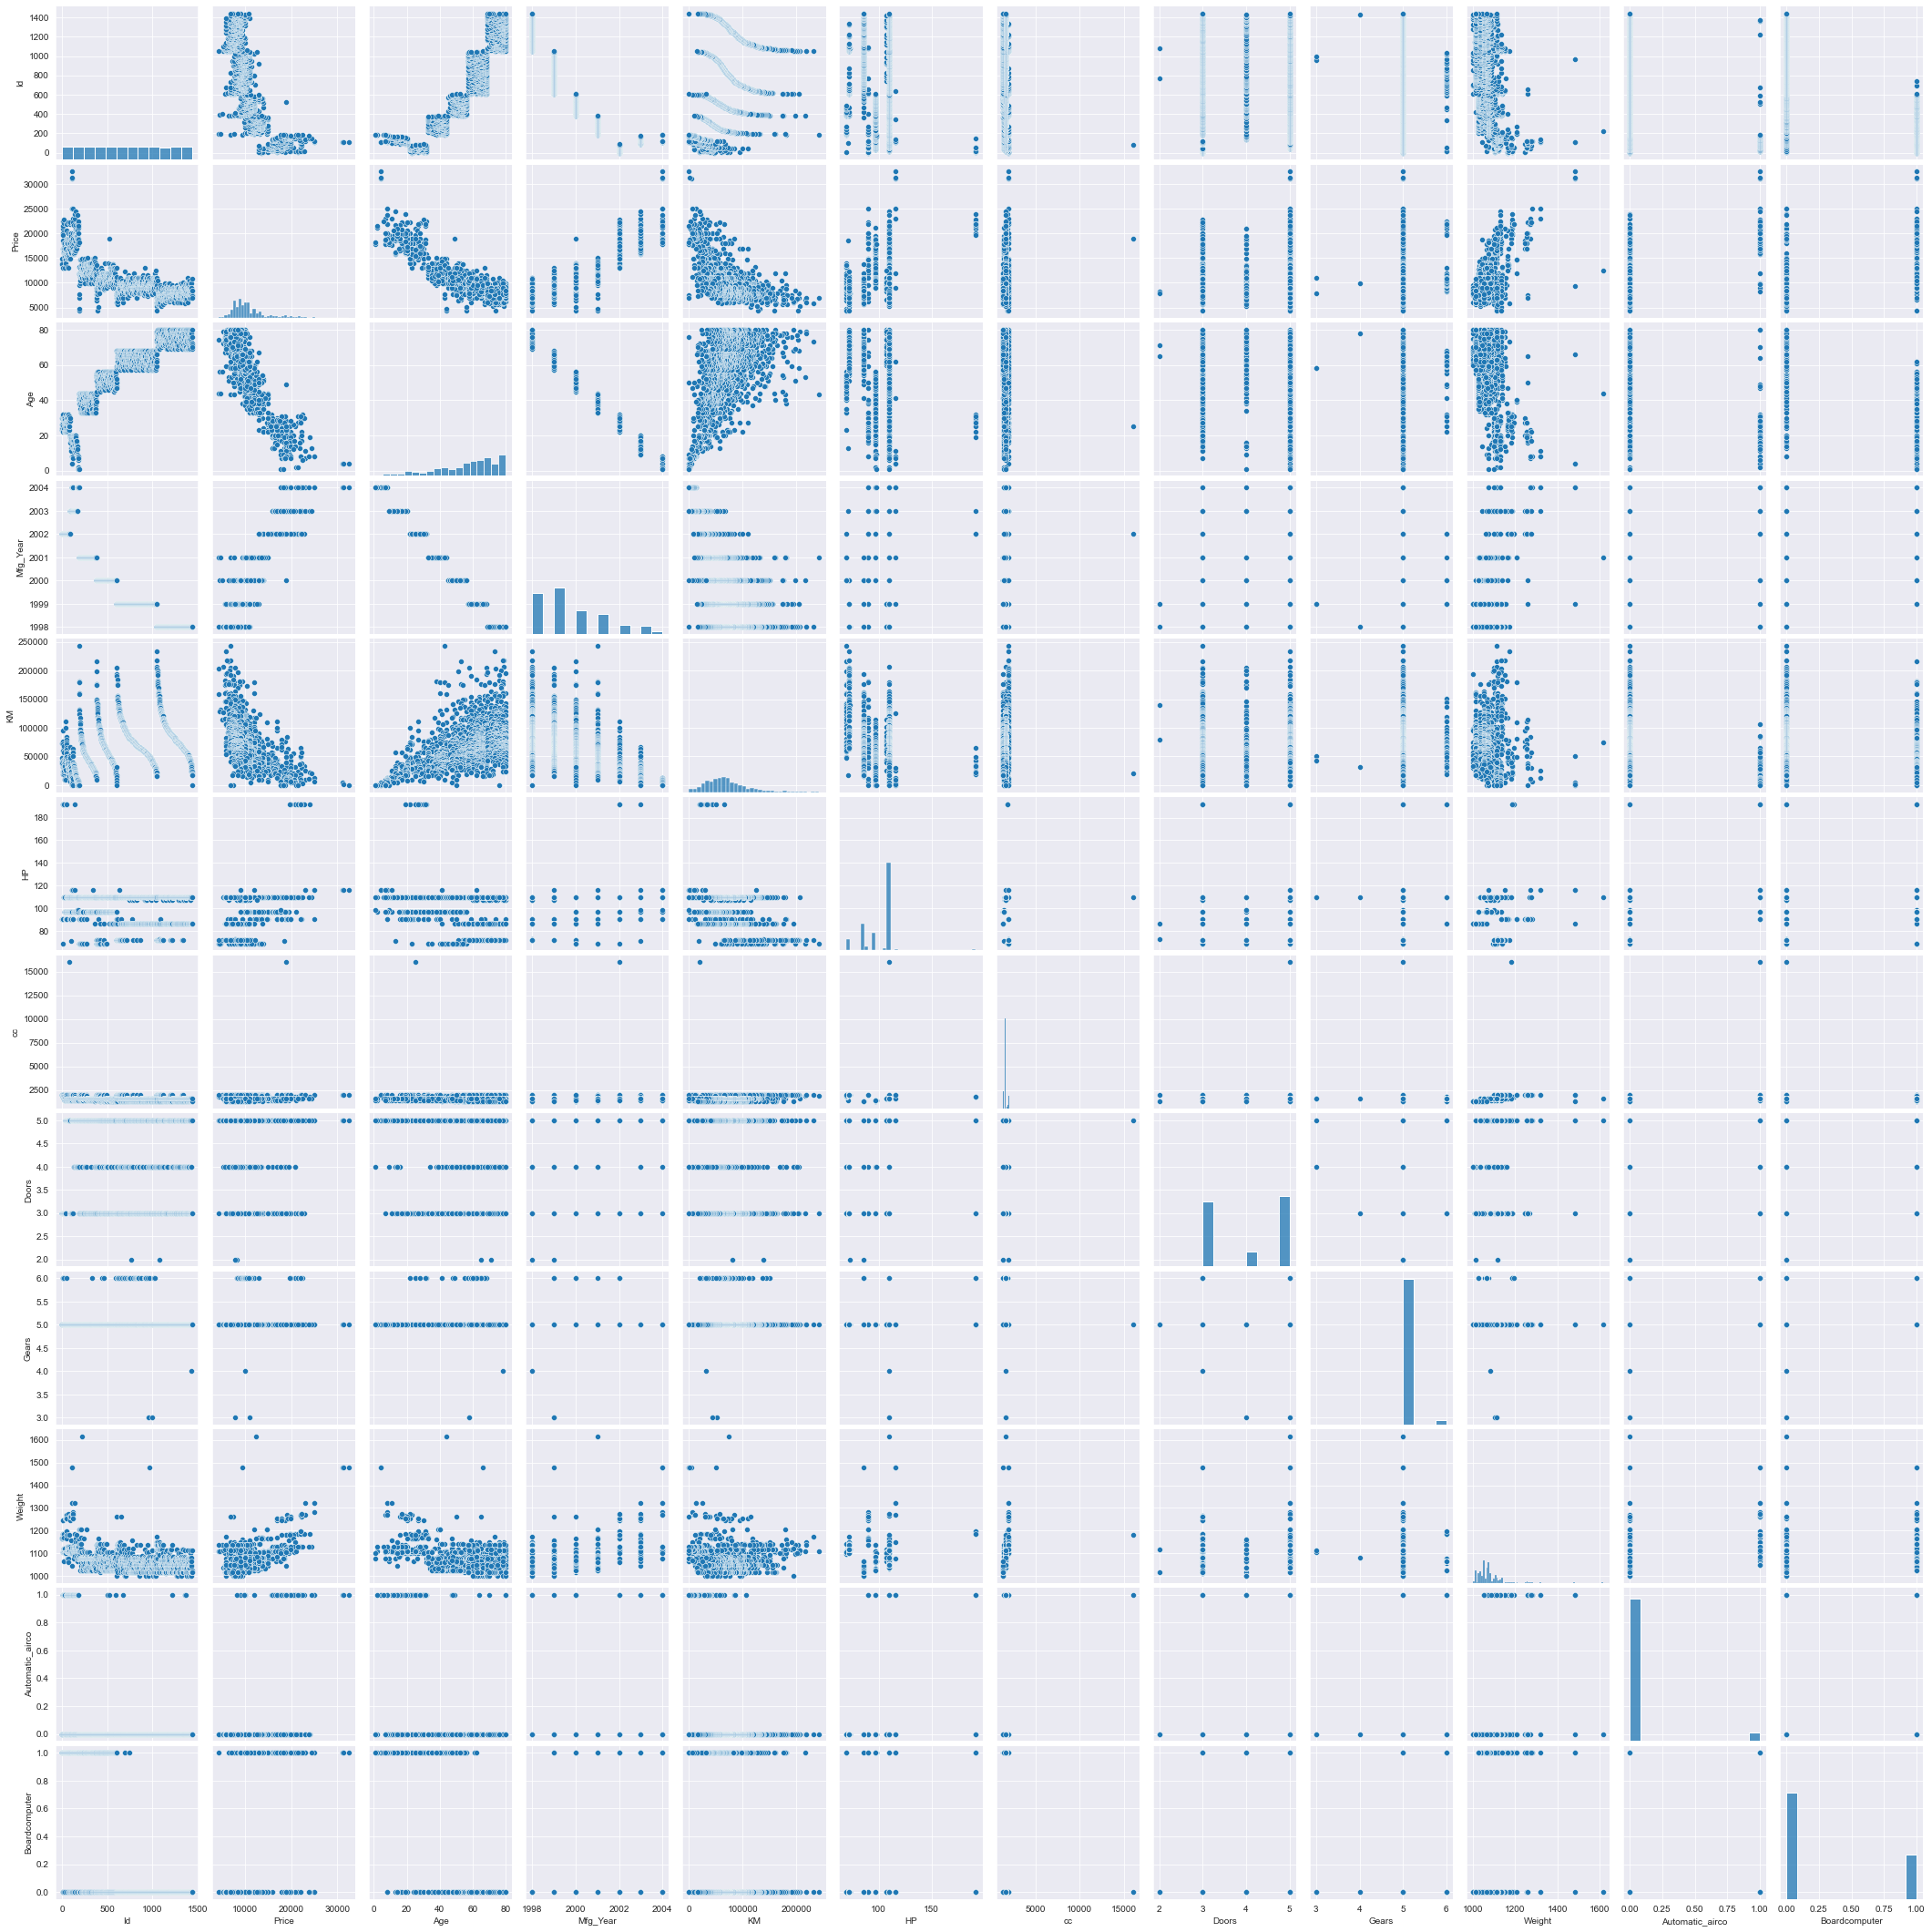

In [18]:
sns.set_style(style='darkgrid')
sns.pairplot(df2)

In [19]:
# model building

In [20]:
from statsmodels.graphics.regressionplots import influence_plot

In [21]:
df2.columns

Index(['Id', 'Price', 'Age', 'Mfg_Year', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Weight', 'Automatic_airco', 'Boardcomputer'],
      dtype='object')

In [22]:
model = smf.ols('Price~Age+Mfg_Year+KM+HP+cc+Doors+Gears+Weight+Automatic_airco+Boardcomputer',data = df2).fit()

In [23]:
model.params  #model parameters

Intercept         -2.263305e+06
Age               -3.048880e+01
Mfg_Year           1.128588e+03
KM                -1.750759e-02
HP                 2.207185e+01
cc                -1.263955e-01
Doors              4.266642e+01
Gears              5.078620e+02
Weight             1.432050e+01
Automatic_airco    2.548910e+03
Boardcomputer     -2.698313e+02
dtype: float64

In [24]:
# t and p values
print(model.tvalues,'\n''\n',model.pvalues)

Intercept          -9.712073
Age                -3.184149
Mfg_Year            9.702383
KM                -16.006822
HP                  9.303447
cc                 -1.572531
Doors               1.188300
Gears               2.876770
Weight             17.622195
Automatic_airco    15.481733
Boardcomputer      -2.646422
dtype: float64 

 Intercept          1.233382e-21
Age                1.483203e-03
Mfg_Year           1.348372e-21
KM                 3.695635e-53
HP                 4.952804e-20
cc                 1.160494e-01
Doors              2.349133e-01
Gears              4.077500e-03
Weight             4.929844e-63
Automatic_airco    4.346894e-50
Boardcomputer      8.224406e-03
dtype: float64


In [25]:
# R squared values
model.rsquared, model.rsquared_adj

(0.891010622014277, 0.8902457842740263)

In [26]:
#Building SLR and MLR models for insignificant variables like 'cc' and 'Doors'

In [27]:
slr_cc = smf.ols('Price~cc',data=df2).fit()
slr_cc.tvalues, slr_cc.pvalues

(Intercept    24.694090
 cc            4.824822
 dtype: float64,
 Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64)

In [28]:
slr_d=smf.ols('Price~Doors',data=df2).fit()
slr_d.tvalues , slr_d.pvalues

(Intercept    19.258097
 Doors         7.141657
 dtype: float64,
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [29]:
mlr_cd=smf.ols('Price~cc+Doors',data=df2).fit()
mlr_cd.tvalues , mlr_cd.pvalues

(Intercept    12.620704
 cc            4.340400
 Doors         6.816153
 dtype: float64,
 Intercept    1.056885e-34
 cc           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

In [30]:
# so both cc and Doors have significant p values 

In [33]:
# Model Validation

In [34]:
df2.columns

Index(['Id', 'Price', 'Age', 'Mfg_Year', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Weight', 'Automatic_airco', 'Boardcomputer'],
      dtype='object')

In [32]:
# Collinearity Problem Check

In [37]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+Weight+Automatic_airco',data=df2).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+Weight+Automatic_airco',data=df2).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Gears+Weight+Automatic_airco',data=df2).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~Age+KM+HP+Doors+Gears+Weight+Automatic_airco',data=df2).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+cc+Gears+Weight+Automatic_airco',data=df2).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+cc+Doors+Weight+Automatic_airco',data=df2).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_WT=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+Automatic_airco',data=df2).fit().rsquared
vif_WT=1/(1-rsq_WT)

rsq_AA=smf.ols('Automatic_airco~Age+KM+HP+cc+Doors+Gears+Weight',data=df2).fit().rsquared
vif_AA=1/(1-rsq_AA)

In [38]:
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','Automatic_airco','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_AA,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.933755
1,KM,1.660875
2,HP,1.250371
3,CC,1.149467
4,Doors,1.162320
5,Gears,1.097445
6,Automatic_airco,1.422535
7,Weight,1.799786


In [41]:
# as all VIF<20 , so there is no collinearity ,

In [42]:
# Residual Analysis

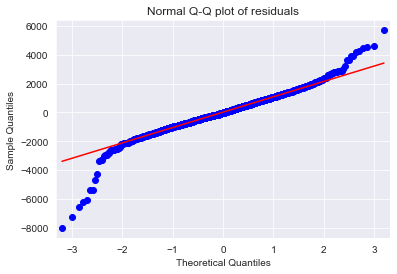

In [43]:
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [44]:
list(np.where(model.resid>6000)) 

[array([], dtype=int64)]

In [45]:
list(np.where(model.resid<-6000))

[array([191, 192, 221, 601, 960], dtype=int64)]

In [46]:
# Homoscedasticity

In [47]:
def standard_values(vals) : 
    return (vals-vals.mean())/vals.std() 

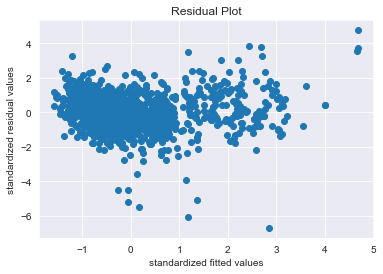

In [48]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [49]:
# Residuals Vs Regressors

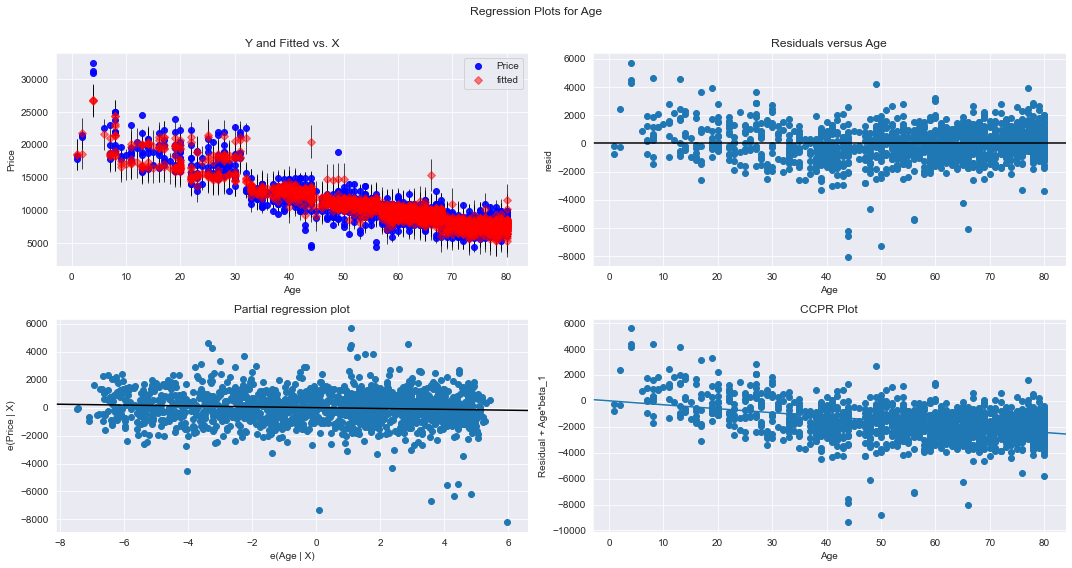

In [50]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

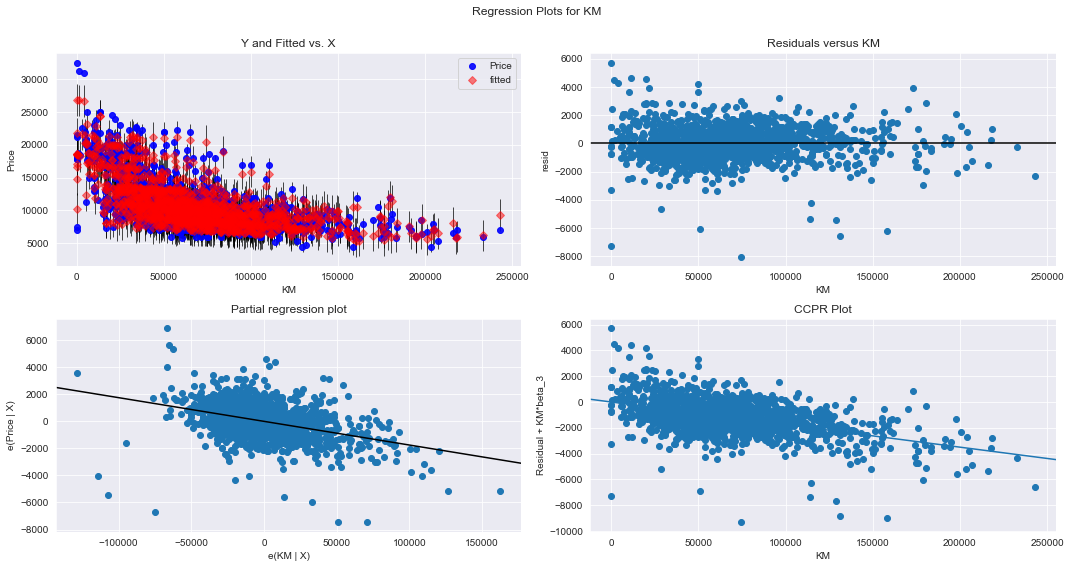

In [51]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

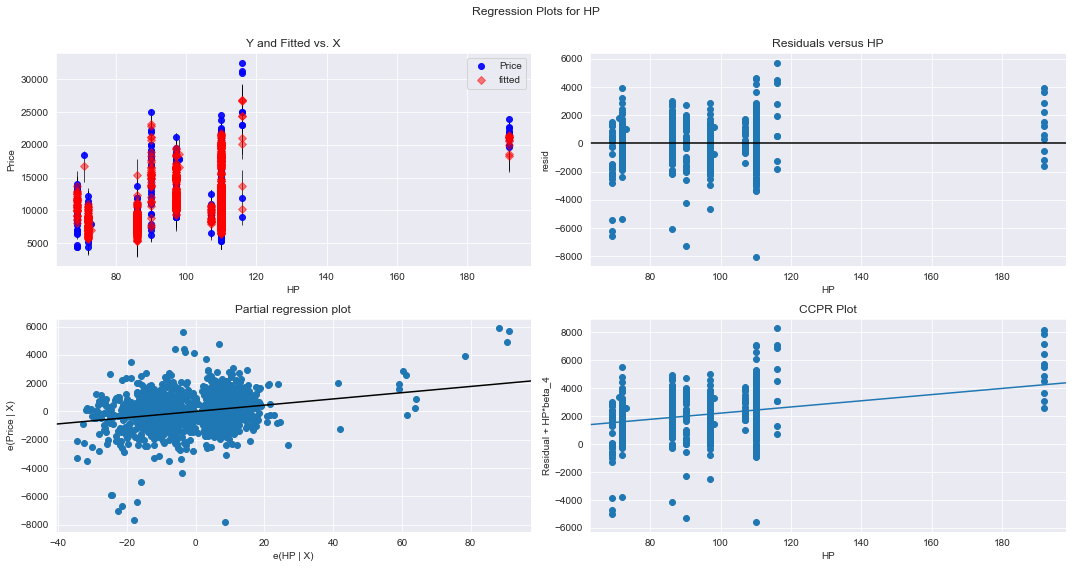

In [52]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

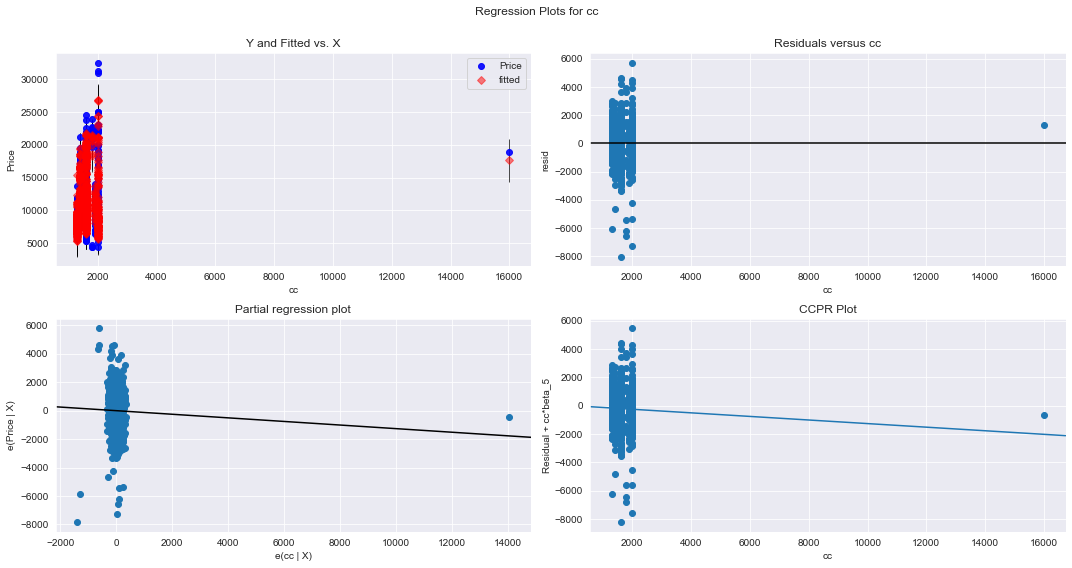

In [54]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

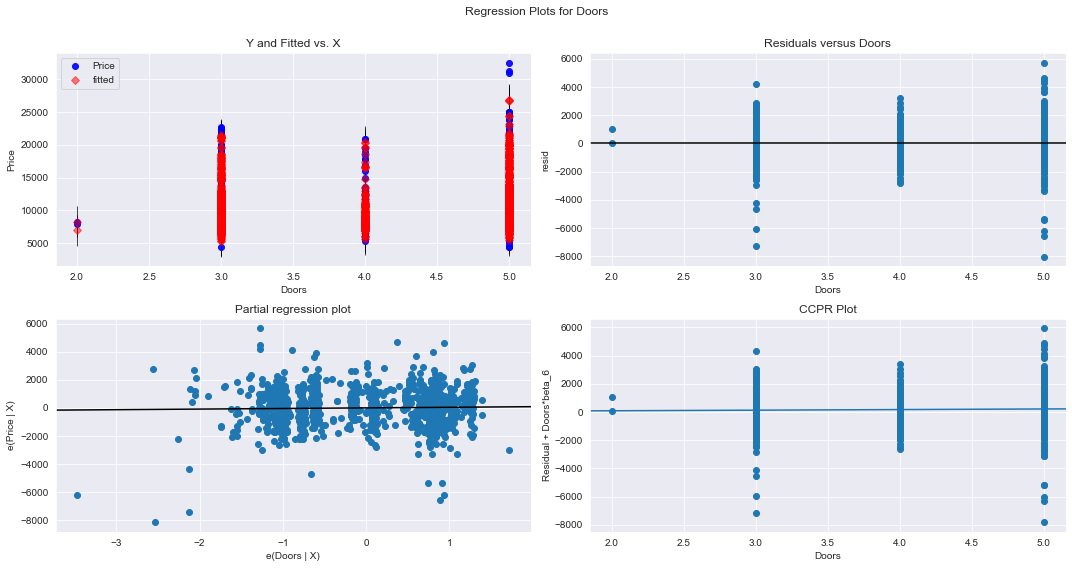

In [55]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

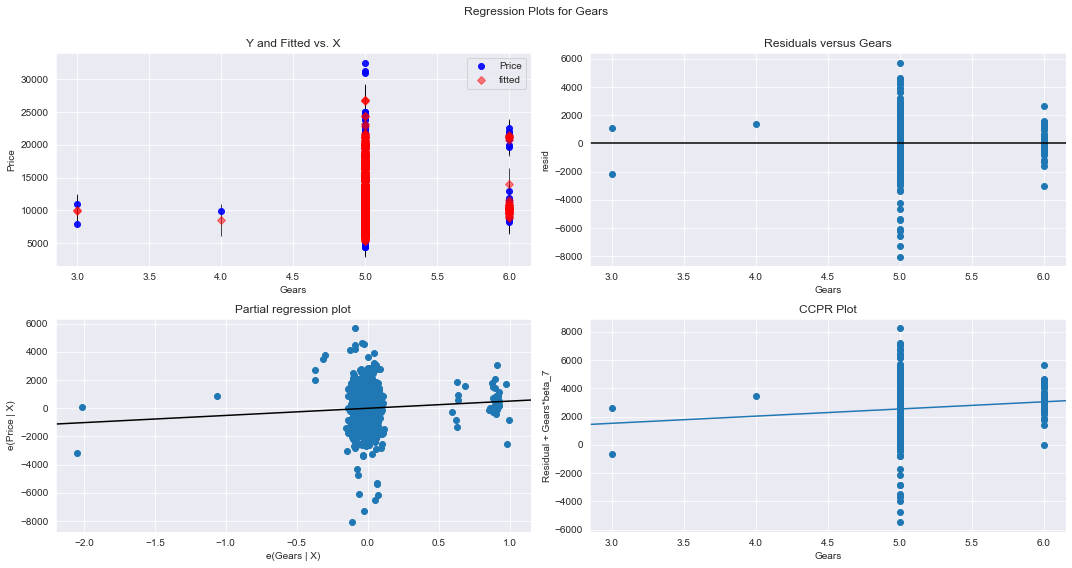

In [56]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

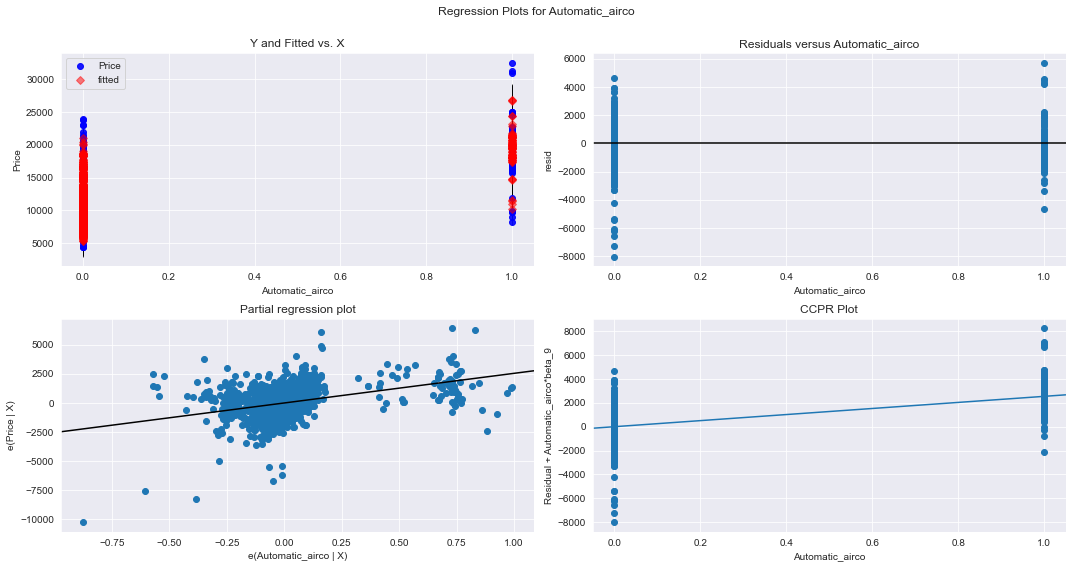

In [57]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Automatic_airco',fig=fig)
plt.show()

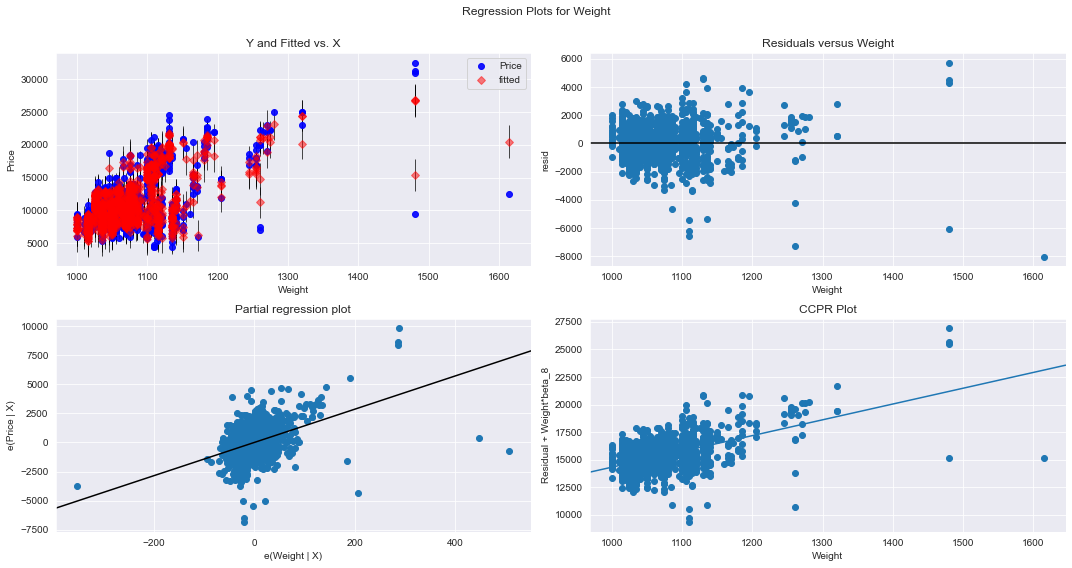

In [58]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [59]:
# Checking Outliers or Influencers

In [60]:
(c,_)=model.get_influence().cooks_distance
c

array([2.16680894e-03, 8.56577560e-04, 1.33993092e-03, ...,
       8.67359585e-05, 4.11497310e-04, 7.92216002e-03])

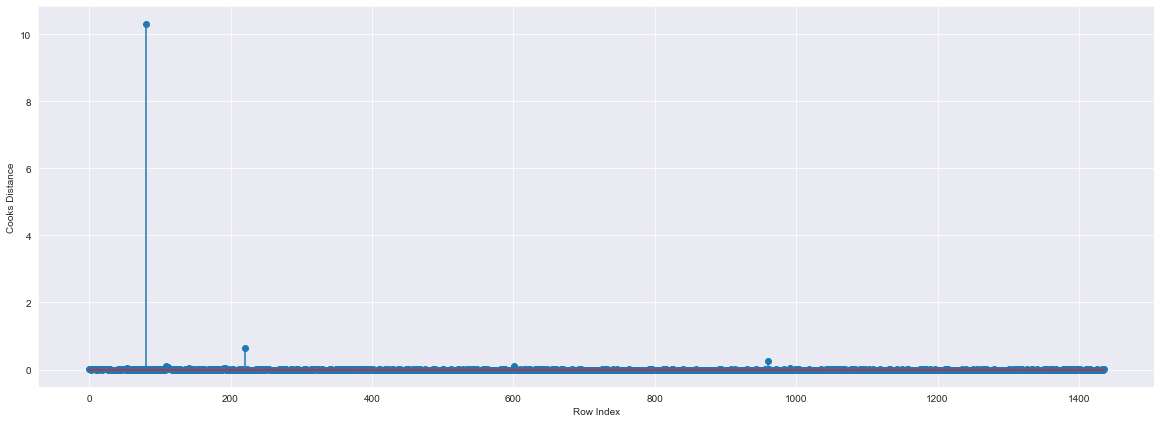

In [63]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [64]:
# Index and value of influencer where C>0.5

In [65]:
np.argmax(c) , np.max(c)

(80, 10.323503011411113)

In [66]:
# Leverage Value

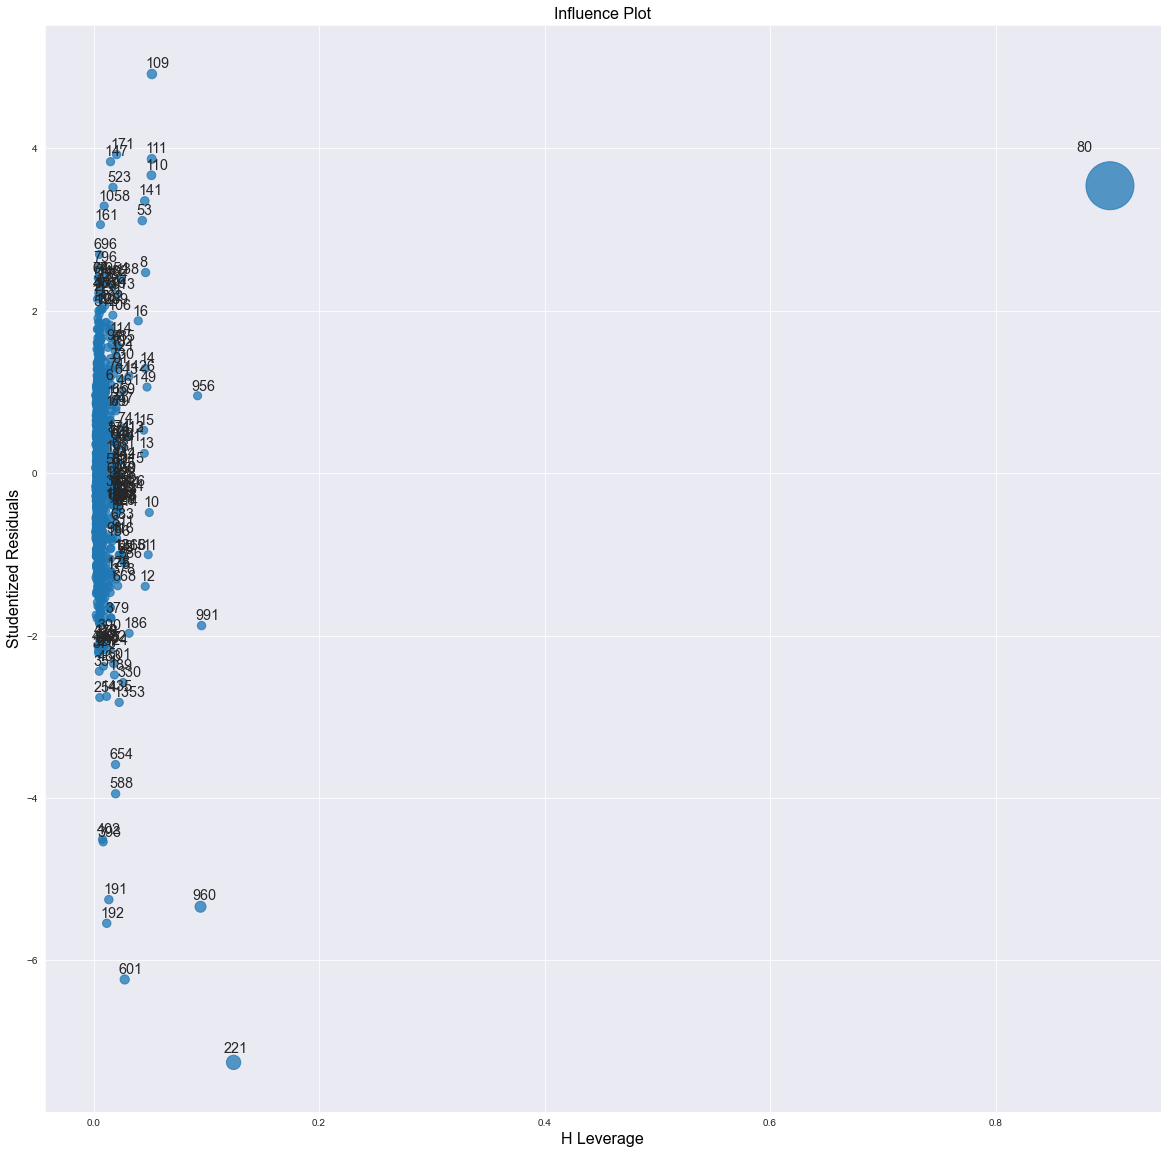

In [67]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [68]:
k=df2.shape[1]
n=df2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.027158774373259052

In [69]:
df2[df2.index.isin([80])] 

,Id,Price,Age,Mfg_Year,KM,HP,cc,Doors,Gears,Weight,Automatic_airco,Boardcomputer
80,81,18950,25,2002,20019,110,16000,5,5,1180,1,0


In [70]:
# Model Improve

In [71]:
df_new=df2.copy()
df_new

,Id,Price,Age,Mfg_Year,KM,HP,cc,Doors,Gears,Weight,Automatic_airco,Boardcomputer
0,1,13500,23,2002,46986,90,2000,3,5,1165,0,1
1,2,13750,23,2002,72937,90,2000,3,5,1165,0,1
2,3,13950,24,2002,41711,90,2000,3,5,1165,0,1
3,4,14950,26,2002,48000,90,2000,3,5,1165,0,1
4,5,13750,30,2002,38500,90,2000,3,5,1170,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,1998,20544,86,1300,3,5,1025,0,0
1432,1439,10845,72,1998,19000,86,1300,3,5,1015,0,0
1433,1440,8500,71,1998,17016,86,1300,3,5,1015,0,0
1434,1441,7250,70,1998,16916,86,1300,3,5,1015,0,0


In [72]:
# Discarding the influencers 

In [73]:
df3=df_new.drop(df_new.index[[80]],axis=0).reset_index(drop=True)
df3

,Id,Price,Age,Mfg_Year,KM,HP,cc,Doors,Gears,Weight,Automatic_airco,Boardcomputer
0,1,13500,23,2002,46986,90,2000,3,5,1165,0,1
1,2,13750,23,2002,72937,90,2000,3,5,1165,0,1
2,3,13950,24,2002,41711,90,2000,3,5,1165,0,1
3,4,14950,26,2002,48000,90,2000,3,5,1165,0,1
4,5,13750,30,2002,38500,90,2000,3,5,1170,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,7500,69,1998,20544,86,1300,3,5,1025,0,0
1431,1439,10845,72,1998,19000,86,1300,3,5,1015,0,0
1432,1440,8500,71,1998,17016,86,1300,3,5,1015,0,0
1433,1441,7250,70,1998,16916,86,1300,3,5,1015,0,0


In [78]:
# Model Diagnostics
# Model Building

In [76]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Automatic_airco+Weight',data=df3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df3=df3.drop(df3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df3
else:
    final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Automatic_airco+Weight',data=df3).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8996345866964445


In [77]:
final_model.rsquared

0.8996345866964445

In [87]:
# accuracy is around 90%

In [88]:
# Model Predictions

In [89]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"Automatic_airco":0,"Weight":1012},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,Automatic_airco,Weight
0,12,40000,80,1300,4,5,0,1012


In [90]:
final_model.predict(new_data)

0    14334.080672
dtype: float64

In [91]:
pred_y=final_model.predict(df3)
pred_y

0       15717.496248
1       15278.817748
2       15699.266243
3       15378.157961
4       15247.542767
            ...     
1427     9133.141371
1428     8560.258833
1429     8701.195757
1430     8810.285342
1431    10833.444328
Length: 1432, dtype: float64